# Chapter 14. Introduction to Network Data
## Notebook for R

### 14.1 Representing and visualizing networks

In [1]:
library(glue)
library(igraph)

g1 = make_graph(edges=c("Hillary Clinton", "Donald Trump", "Bernie Sanders","Hillary Clinton", "Hillary Clinton", 
                        "Barack Obama", "John McCain", "Donald Trump", "Barack Obama", "Bernie Sanders"), directed = FALSE)
glue("Imaginary Facebook network of 5 American politicians")
print(g1)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




Imaginary Facebook network of 5 American politicians

IGRAPH b6a91b5 UN-- 5 5 -- 
+ attr: name (v/c)
+ edges from b6a91b5 (vertex names):
[1] Hillary Clinton--Donald Trump   Hillary Clinton--Bernie Sanders
[3] Hillary Clinton--Barack Obama   Donald Trump   --John McCain   
[5] Bernie Sanders --Barack Obama  


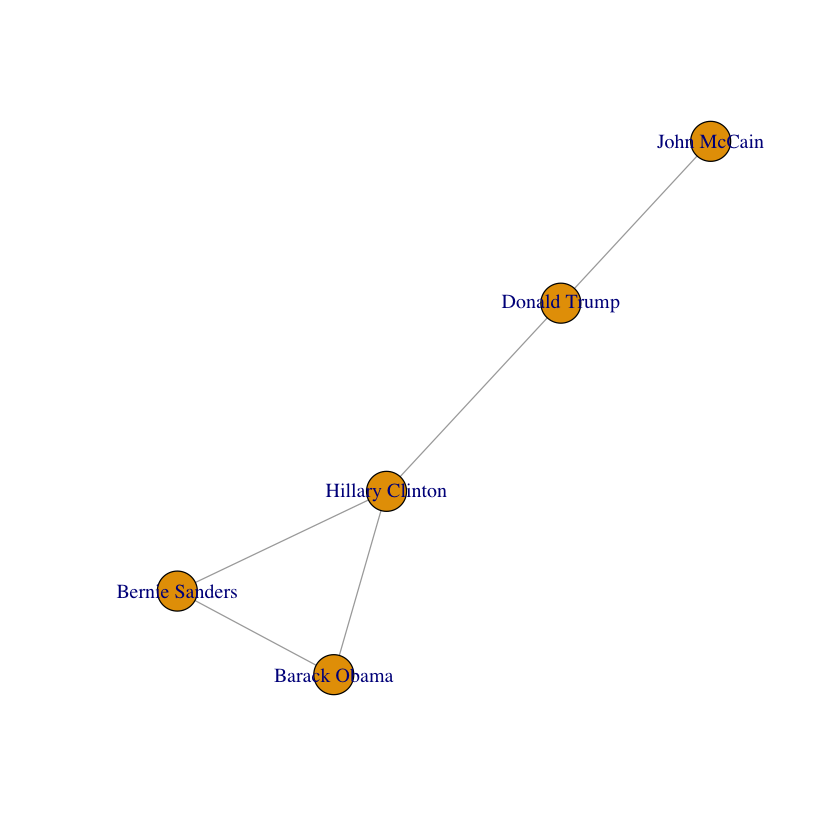

In [2]:
plot(g1)

In [3]:
g2 = make_graph(edges=c("Hillary Clinton", "Donald Trump", "Bernie Sanders","Hillary Clinton", "Hillary Clinton", 
                        "Barack Obama", "John McCain", "Donald Trump", "Barack Obama", "Hillary Clinton",
                       "Hillary Clinton", "Bernie Sanders", "Barack Obama", "Bernie Sanders"), directed = TRUE)
glue("Imaginary Twitter network of 5 American politicians")
print(g2)

Imaginary Twitter network of 5 American politicians

IGRAPH c73a9ee DN-- 5 7 -- 
+ attr: name (v/c)
+ edges from c73a9ee (vertex names):
[1] Hillary Clinton->Donald Trump    Bernie Sanders ->Hillary Clinton
[3] Hillary Clinton->Barack Obama    John McCain    ->Donald Trump   
[5] Barack Obama   ->Hillary Clinton Hillary Clinton->Bernie Sanders 
[7] Barack Obama   ->Bernie Sanders 


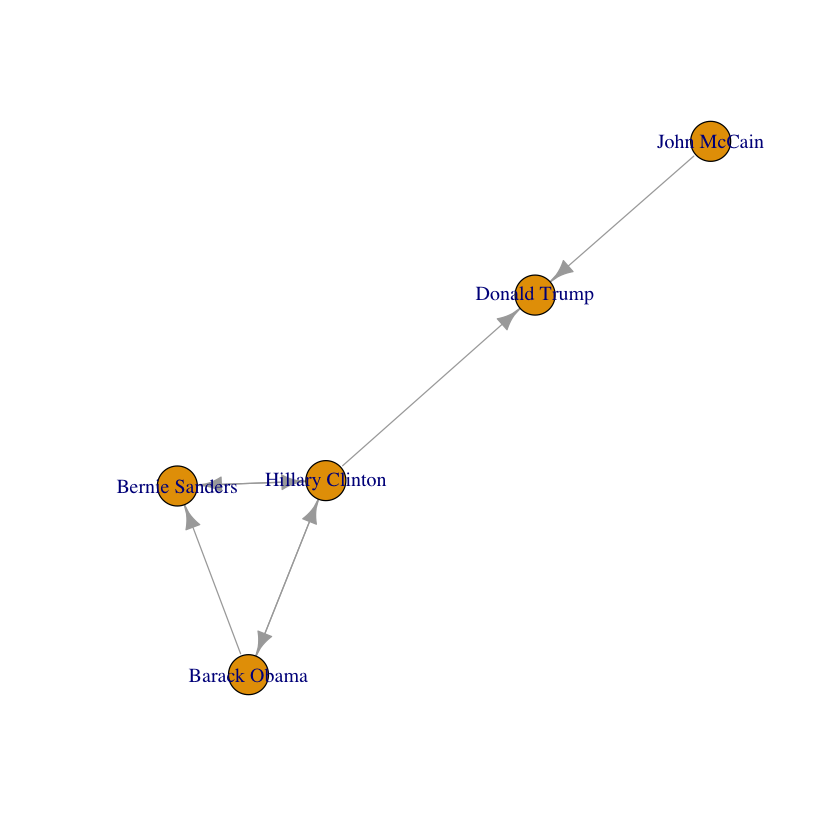

In [4]:
plot(g2)

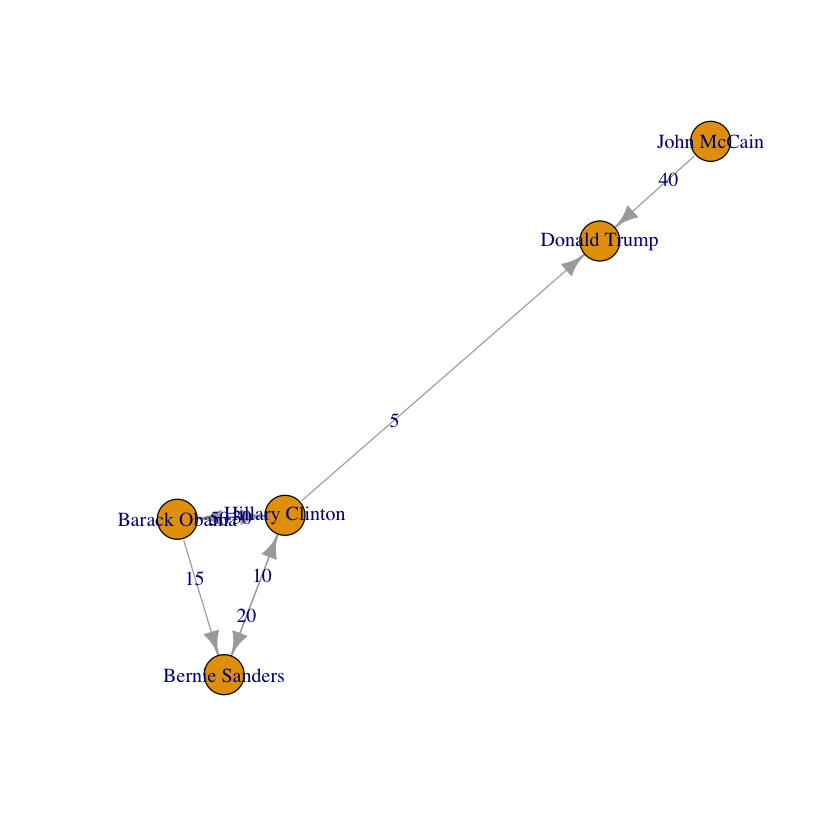

In [5]:
E(g2)$weight = c(5, 20, 30, 40, 50, 10, 15)
plot(g2, edge.label = E(g2)$weight)

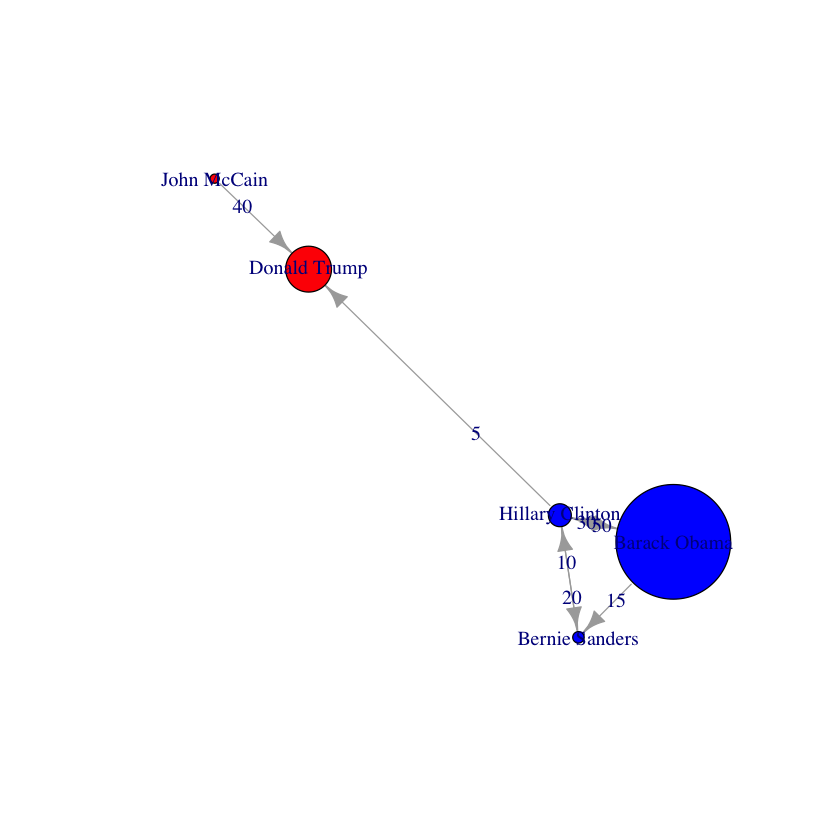

In [6]:
V(g2)$followers = c(100000, 200000, 50000, 500000, 40000)
V(g2)$party <- c("Democrat", "Republican", "Democrat", "Democrat", "Republican")
V(g2)$color = V(g2)$party
V(g2)$color = gsub("Democrat", "blue", V(g2)$color)
V(g2)$color = gsub("Republican", "red", V(g2)$color)
#vertex_attr(g2)
plot(g2, edge.label = E(g2)$weight, vertex.size = V(g2)$followers*0.0001)


In [7]:
g3 = induced_subgraph(g1, c(1,3,4))
glue("Democrats subgraph")
print(g3)
g4 = induced_subgraph(g1, c(2,5))
glue("Republicans subgraph")
print(g4)

Democrats subgraph

IGRAPH ef6a697 UN-- 3 3 -- 
+ attr: name (v/c)
+ edges from ef6a697 (vertex names):
[1] Hillary Clinton--Bernie Sanders Hillary Clinton--Barack Obama  
[3] Bernie Sanders --Barack Obama  


Republicans subgraph

IGRAPH 6c65040 UN-- 2 1 -- 
+ attr: name (v/c)
+ edge from 6c65040 (vertex names):
[1] Donald Trump--John McCain


In [8]:
edges = read.csv("http://cssbook.net/d/politicians_twitter.csv", header=FALSE)
g2 = graph_from_data_frame(d=edges) 
glue("Nodes: ", gorder(g2), "  Edges: ", gsize(g2))

Nodes: 5  Edges: 7

### 14.2 Social network analysis

In [9]:
all_simple_paths(g1, "Barack Obama", "John McCain", mode = c("all"))

[[1]]
+ 4/5 vertices, named, from b6a91b5:
[1] Barack Obama    Hillary Clinton Donald Trump    John McCain    

[[2]]
+ 5/5 vertices, named, from b6a91b5:
[1] Barack Obama    Bernie Sanders  Hillary Clinton Donald Trump   
[5] John McCain    


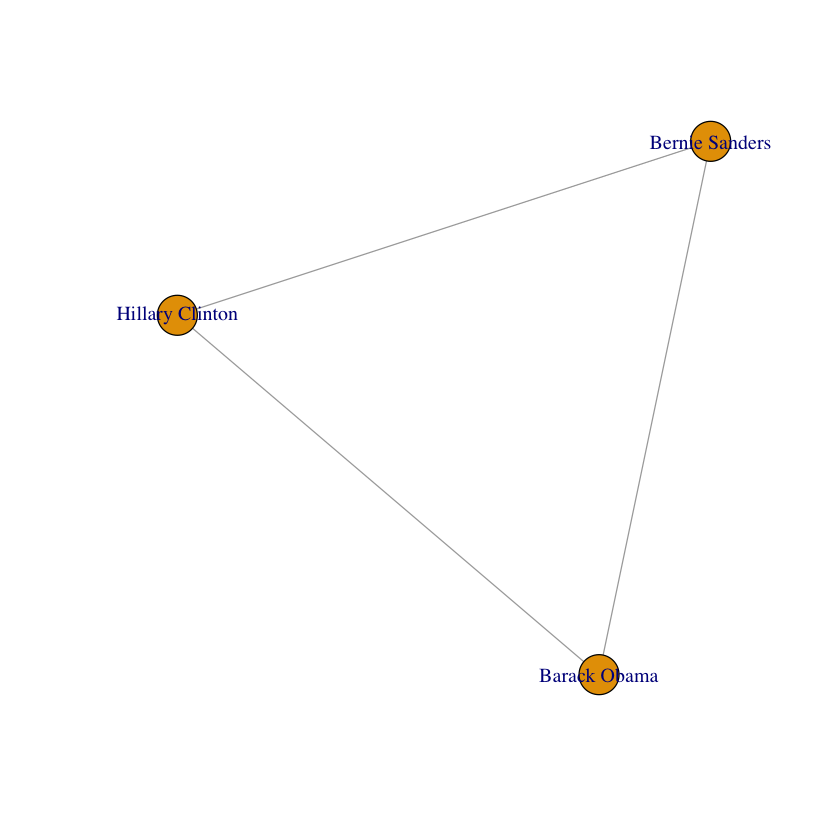

In [10]:
plot(g3)

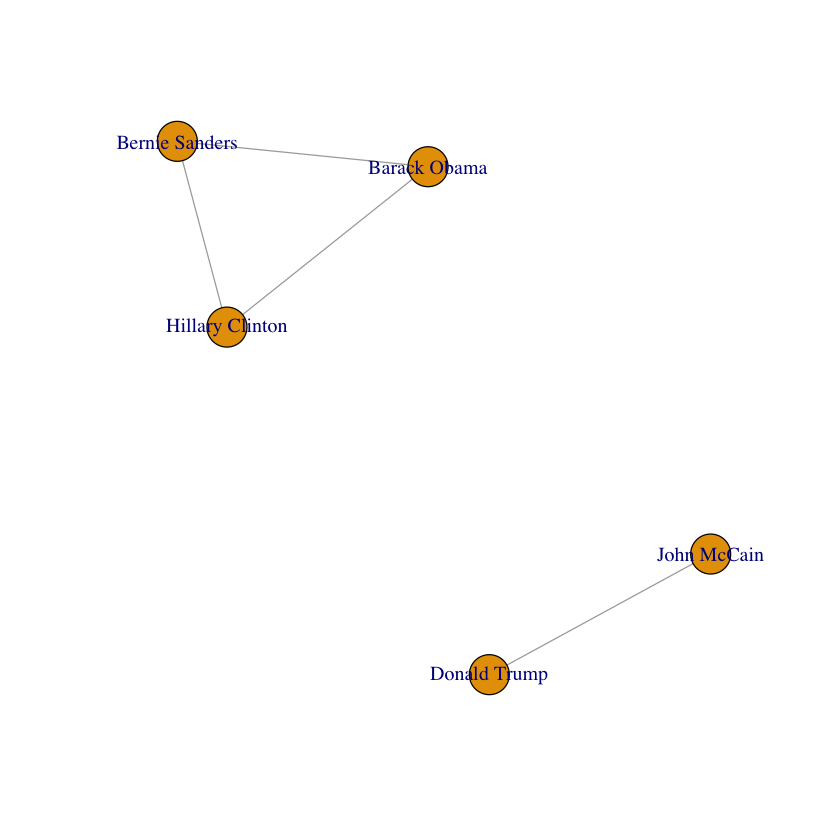

In [11]:
#Remove the friendship between Clinton and Trump in Facebook
g6 = delete.edges(g1, E(g1, P=c("Hillary Clinton","Donald Trump")) )
plot(g6)

In [12]:
glue("Average path length in Facebook network: ", mean_distance(g1, directed = T))
glue('Distance between Obama and McCain in Facebook network: ', distances(g1, v="Barack Obama", to="John McCain", weights=NA))

Average path length in Facebook network: 1.7

Distance between Obama and McCain in Facebook network: 3

In [13]:
#mode: all, out, in
glue("Incident edges of John McCain in Facebook Network:")
incident(g1, V(g1)["John McCain"], mode="all")
glue("Neighbors of John McCain in Facebook Network:")
neighbors(g1, V(g1)["John McCain"], mode="all")

Incident edges of John McCain in Facebook Network:

+ 1/5 edge from b6a91b5 (vertex names):
[1] Donald Trump--John McCain

Neighbors of John McCain in Facebook Network:

+ 1/5 vertex, named, from b6a91b5:
[1] Donald Trump

In [14]:
glue("Density in Facebook network: ", edge_density(g1))
glue("Density in Twitter network: ", ecount(g2)/(vcount(g2)*(vcount(g2)-1)) )
glue("Transitivity in Facebook network: ", transitivity(g1), type="global")
glue("Diameter in Facebook network: ", diameter(g1, directed = F, weights = NA))
glue("Reciprocity in Twitter network: ", reciprocity(g2))

Density in Facebook network: 0.5

Density in Twitter network: 0.35

Transitivity in Facebook network: 0.5

Diameter in Facebook network: 3

Reciprocity in Twitter network: 0.571428571428571

In [15]:
glue("Degree centrality of the Facebook network (undirected):" )
print(degree(g1, normalized = T))
glue("Degree centrality of the Twitter network (directed):" )
print(degree(g2, normalized = T, mode="all"))
glue("In degree centrality of the Twitter network (directed):" )
print(degree(g2, normalized = T, mode="in"))
glue("Out degree centrality of the Twitter network (directed):" )
print(degree(g2, normalized = T, mode="out"))

Degree centrality of the Facebook network (undirected):

Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
           0.75            0.50            0.50            0.50            0.25 


Degree centrality of the Twitter network (directed):

Hillary Clinton  Bernie Sanders     John McCain    Barack Obama    Donald Trump 
           1.25            0.75            0.25            0.75            0.50 


In degree centrality of the Twitter network (directed):

Hillary Clinton  Bernie Sanders     John McCain    Barack Obama    Donald Trump 
           0.50            0.50            0.00            0.25            0.50 


Out degree centrality of the Twitter network (directed):

Hillary Clinton  Bernie Sanders     John McCain    Barack Obama    Donald Trump 
           0.75            0.25            0.25            0.50            0.00 


In [16]:
glue("Closeness centrality of the Facebook network (undirected):" )
print(closeness(g1, normalized = T))
glue("Eigenvector centrality of the Facebook network (undirected):" )
print(eigen_centrality(g1, scale=F)$vector)
glue("Betweenness centrality of the Facebook network (undirected):" )
print(betweenness(g1, normalized = T))

Closeness centrality of the Facebook network (undirected):

Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
      0.8000000       0.6666667       0.5714286       0.5714286       0.4444444 


Eigenvector centrality of the Facebook network (undirected):

Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
      0.6037035       0.3424853       0.4971537       0.4971537       0.1546684 


Betweenness centrality of the Facebook network (undirected):

Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
      0.6666667       0.5000000       0.0000000       0.0000000       0.0000000 


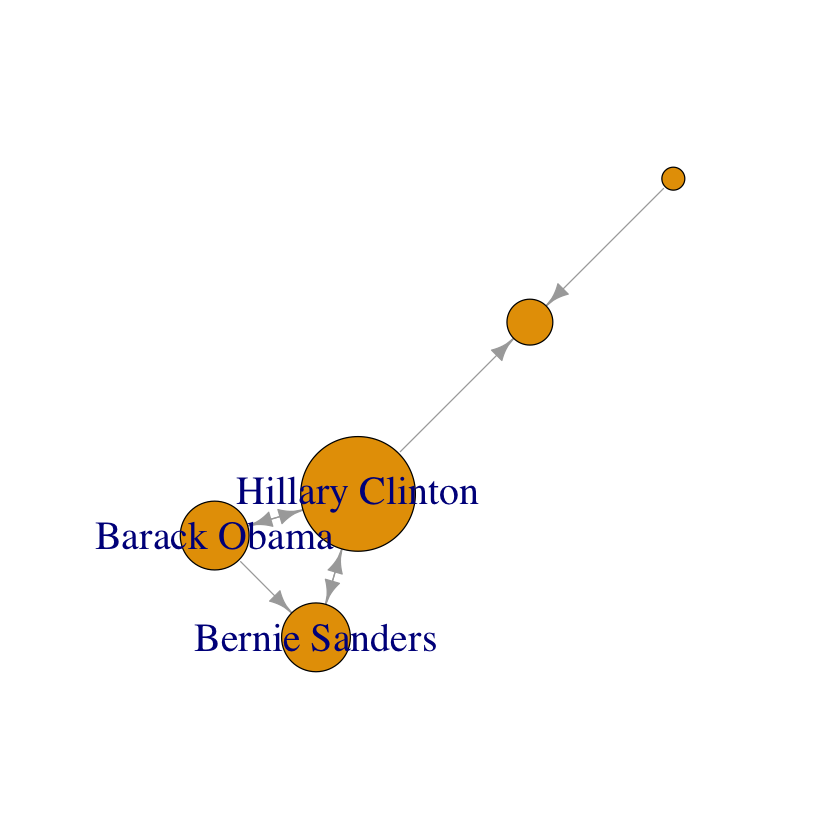

In [17]:
plot(g2, vertex.label.cex = 2, vertex.size=degree(g2, normalized = T)*40, vertex.label = ifelse(degree(g2, normalized = T) > 0.5, V(g2)$name, NA))

In [18]:
glue("Number of cliques: ", clique_num(g1))
glue("Cliques:")
max_cliques(g1)

Number of cliques: 3

Cliques:

[[1]]
+ 2/5 vertices, named, from b6a91b5:
[1] Donald Trump John McCain 

[[2]]
+ 2/5 vertices, named, from b6a91b5:
[1] Donald Trump    Hillary Clinton

[[3]]
+ 3/5 vertices, named, from b6a91b5:
[1] Hillary Clinton Bernie Sanders  Barack Obama   


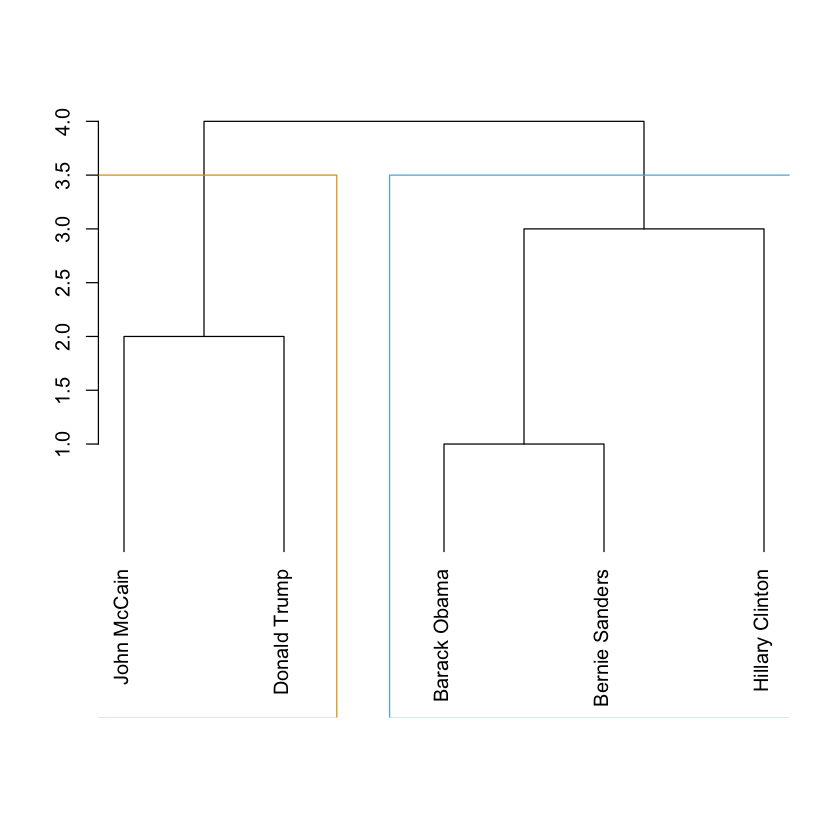

In [19]:
cluster1 = cluster_edge_betweenness(g1) 
dendPlot(cluster1, mode="hclust")

In [20]:
glue("Girvan-Neuman")
glue("Length: ", length(cluster1)) #best partitioning best on modularity
glue("Membership: ")
membership(cluster1)
glue("Modularity: ", modularity(cluster1))
#crossing(cluster1, g1) #True for edges across communities
#plot(cluster2, g1)

Girvan-Neuman

Length: 2

Membership:

Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
              1               2               1               1               2 

Modularity: 0.22

In [21]:
glue("Louvain")
cluster2 = cluster_louvain(g1) 
glue("Length: ", length(cluster2))
glue("Membership: ")
membership(cluster2)
glue("Modularity: ", modularity(cluster2))

glue("Greedy optimization: ")
cluster3 = cluster_fast_greedy(g1) 
glue("Length: ", length(cluster3))
glue("Membership: ")
membership(cluster3)
glue("Modularity: ", modularity(cluster3))

glue("Propagating label: ")
cluster4 = cluster_label_prop(g1) 
glue("Length: ", length(cluster4))
glue("Membership: ")
membership(cluster4)
glue("Modularity: ", modularity(cluster4))

Louvain

Length: 2

Membership:

Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
              1               2               1               1               2 

Modularity: 0.22

Greedy optimization:

Length: 2

Membership:

Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
              1               2               1               1               2 

Modularity: 0.22

Propagating label:

Length: 1

Membership:

Hillary Clinton    Donald Trump  Bernie Sanders    Barack Obama     John McCain 
              1               1               1               1               1 

Modularity: 0

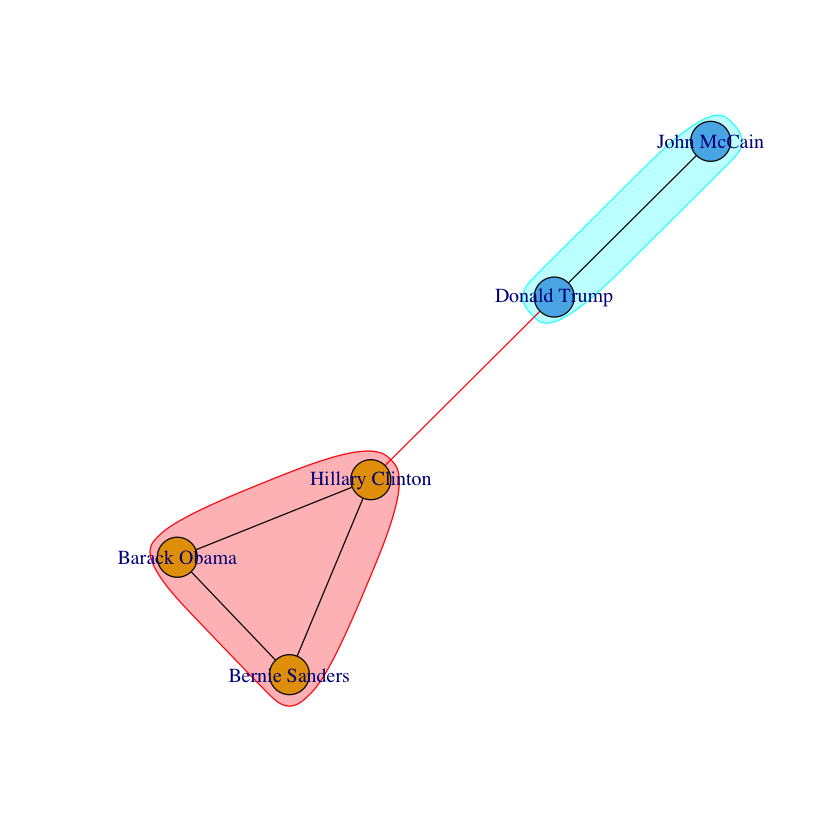

In [22]:
plot(cluster3, g1)#Greedy optimization